# Summary

The following is an exploration of different functions for generating prime numbers. The Sieve of Erathosthemes is a common method that can allow for prime number generation up to N, with the expense of high computational efforts. 

Here we use the Sieve to generate primes up to 10,000 (an arbitrary selection). For our first comparison, we use 2N-1. As is shown below, 2N-1 fits the first 10 prime numbers remarkably well, but shows signs of diverging as N grows larger.

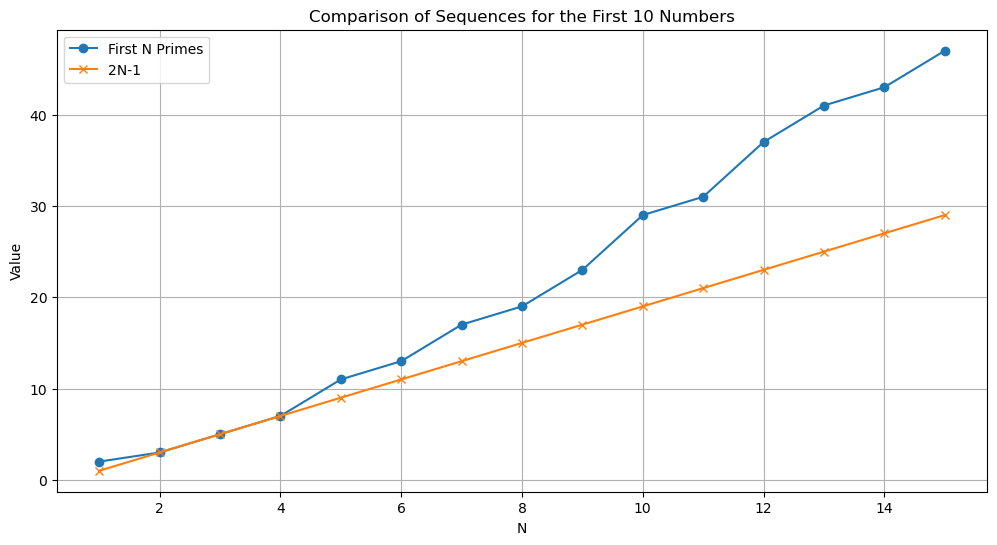

In [61]:
import matplotlib.pyplot as plt
import math as math

# Function to generate the first N prime numbers
def generate_first_n_primes(n):
    primes = []
    candidate = 2
    while len(primes) < n:
        is_prime = True
        for prime in primes:
            if candidate % prime == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(candidate)
        candidate += 1
    return primes

# Function to calculate 2N-1 and N^2 + N + 41 for the first N natural numbers
def linear(n):
    two_n_minus_one = [2*N - 1 for N in range(1, n+1)]
    return two_n_minus_one

# Number of primes to compare
N = 15

# Generate the first N prime numbers
first_n_primes = generate_first_n_primes(N)

# Calculate the sequences for 2N-1 
two_n_minus_one = linear(N)

# Plotting
plt.figure(figsize=(12, 6))

# Plot first N prime numbers
plt.plot(range(1, N+1), first_n_primes, 'o-', label='First N Primes')

# Plot 2N-1 sequence
plt.plot(range(1, N+1), two_n_minus_one, 'x-', label='2N-1')

# Customizing the plot
plt.xlabel('N')
plt.ylabel('Value')
plt.title('Comparison of Sequences for the First 10 Numbers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Now we try to fit a polynomial to the prime line. We can see that this does not generate as nice a fit. Thus, we can see that the term must sit somewhere between the two. As well, we keep in mind that prime density grows over time. 

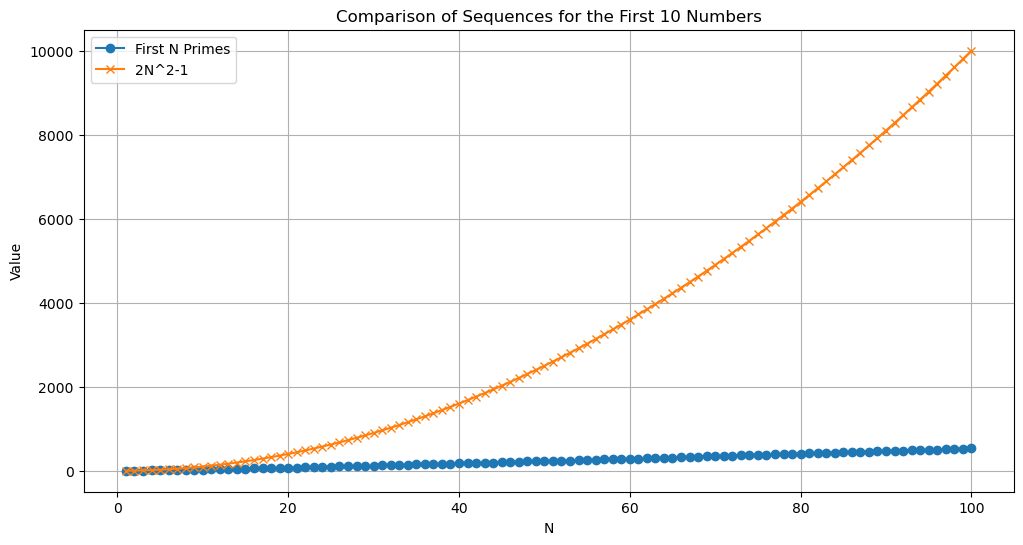

In [56]:
import matplotlib.pyplot as plt


# Function to calculate 2N-1 and N^2 + N + 41 for the first N natural numbers
def polynomial(n):
    two_n_squared_minus_one = [N**2 - 1 for N in range(1, n+1)]
    return two_n_squared_minus_one

# Number of primes to compare
N = 100

# Generate the first N prime numbers
first_n_primes = generate_first_n_primes(N)

# Calculate the sequences for 2N-1 
two_n_squared_minus_one = polynomial(N)

# Plotting
plt.figure(figsize=(12, 6))

# Plot first N prime numbers
plt.plot(range(1, N+1), first_n_primes, 'o-', label='First N Primes')

# Plot 2N-1 sequence
plt.plot(range(1, N+1), two_n_squared_minus_one, 'x-', label='2N^2-1')

# Customizing the plot
plt.xlabel('N')
plt.ylabel('Value')
plt.title('Comparison of Sequences for the First 10 Numbers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# 

We can also see that for a very large N, the polynomial function grows too fast. The linear function grows too slow. 

In [95]:
n = 40000
first_n_primes = generate_first_n_primes(n)
polys = polynomial(n)
linears = linear(n)
print(f"prime at n, {first_n_primes[n-1]}")
print(f"polynomial, {polys[n-1]}")
print(f"linear, {linears[n-1]}")

prime at n, 479909
polynomial, 1599999999
linear, 79999


Next, we look for a function that may yield a better fit for large N. 

In [174]:
def polynomial_modified(n):
    poly_mod = [N**1.5 - 1 for N in range(1, n+1)]
    return poly_mod

def log(n):
    log_m = [1.128896*n * math.log(n) for n in range(1, n+1) if n > 1]
    return log_m

poly_mod = polynomial_modified(n)
log_n = log(n)
print(f"prime at n, {first_n_primes[n-2]}")
print(f"poly mod, {poly_mod[n-2]}")
print(f"log, {log_n[n-2]}")

prime at n, 1299689
poly mod, 31622301.261220623
log, 1299689.550570303


Nice! The logarithmic function seems to more closely match the actual occurence of the prime. Next, we will graph this out. 

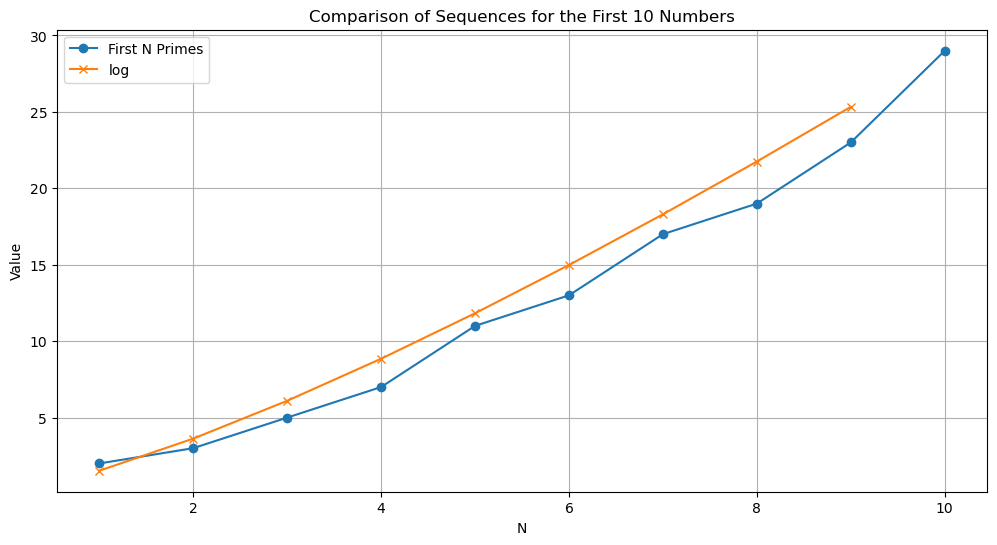

In [161]:

# Plotting
plt.figure(figsize=(12, 6))

# Plot first N prime numbers
plt.plot(range(1, n+1), first_n_primes, 'o-', label='First N Primes')

# Plot log
plt.plot(range(1, len(log_n)+1), log_n, 'x-', label='log')

# Customizing the plot
plt.xlabel('N')
plt.ylabel('Value')
plt.title('Comparison of Sequences for the First 10 Numbers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Wow! Those lines almost resemble each other. Let's zoom in on a smaller set of N. 

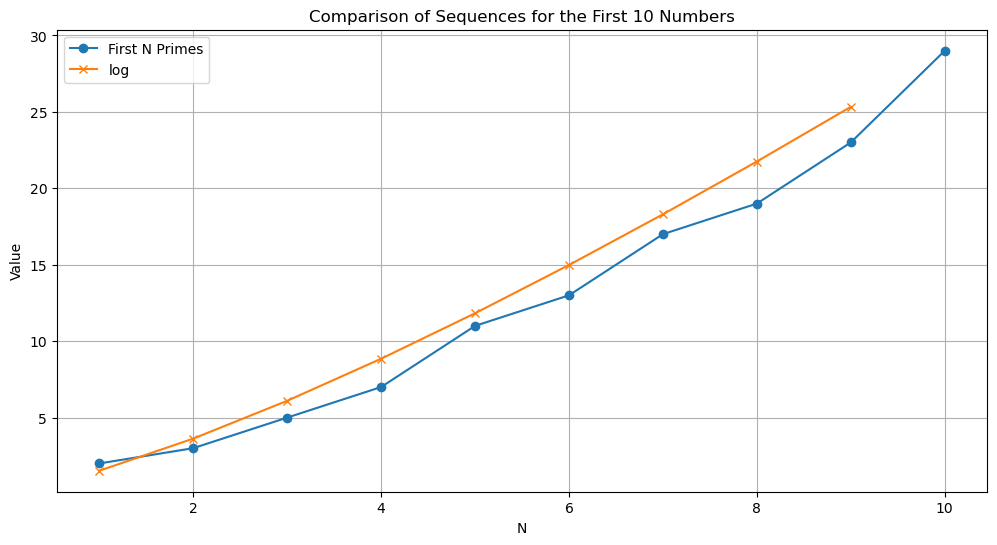

In [162]:
n = 10
first_n_primes = generate_first_n_primes(n)
log_n = log(n)

# Plotting
plt.figure(figsize=(12, 6))

# Plot first N prime numbers
plt.plot(range(1, n+1), first_n_primes, 'o-', label='First N Primes')

# Plot log
plt.plot(range(1, len(log_n)+1), log_n, 'x-', label='log')

# Customizing the plot
plt.xlabel('N')
plt.ylabel('Value')
plt.title('Comparison of Sequences for the First 10 Numbers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

We can see that for small N, the line almost fits exactly. Our next step, should be to calculate the level of precision for large N.  To do this, we first calculate primes and approximations for a very large N (this will take a while to process). (approximately 2-3 minutes)

In [163]:
n = 100000
first_n_primes = generate_first_n_primes(n)
log_n = log(n)

print(f"prime at n, {first_n_primes[n-1]}")
print(f"log, {log_n[n-2]}")

prime at n, 1299709
log, 1266421.8011467254


We can see once again, that n log n does remarkably well when compared with other functions at approximating the prime. We can now attempt to calculate the error between the primes and this function. 

Average Absolute Error: 977.0072149547643
Average Relative Error: 0.0032160775033654673


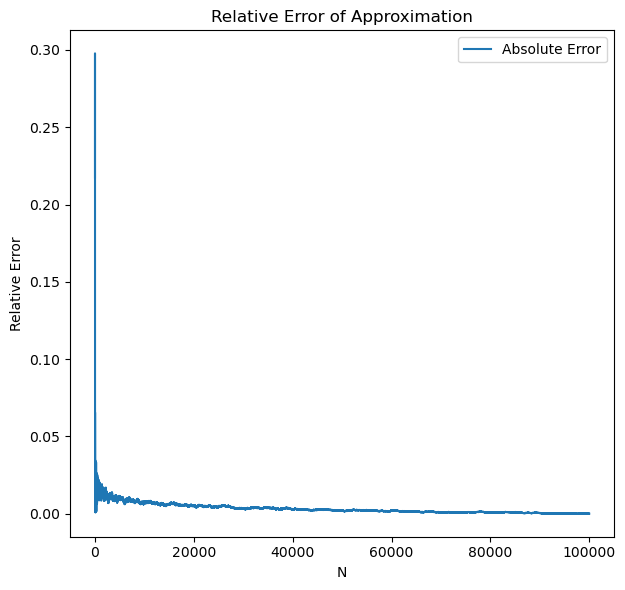

In [175]:
absolute_errors = [abs(actual - approx) for actual, approx in zip(first_n_primes, log_n)]
relative_errors = [abs_err / actual if actual != 0 else 0 for abs_err, actual in zip(absolute_errors, first_n_primes)]
average_absolute_error = np.mean(absolute_errors)
average_relative_error = np.mean(relative_errors)

print(f"Average Absolute Error: {average_absolute_error}")
print(f"Average Relative Error: {average_relative_error}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(relative_errors)+1), relative_errors, label='Absolute Error')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title('Relative Error of Approximation')
plt.legend()

plt.tight_layout()
plt.show()



This strangly shows that for large N the relative error is remarkably low. For smaller N, there appears to be some outlier. 

Average Absolute Error: 0.5042292813423459
Average Relative Error: 0.0886585943162178


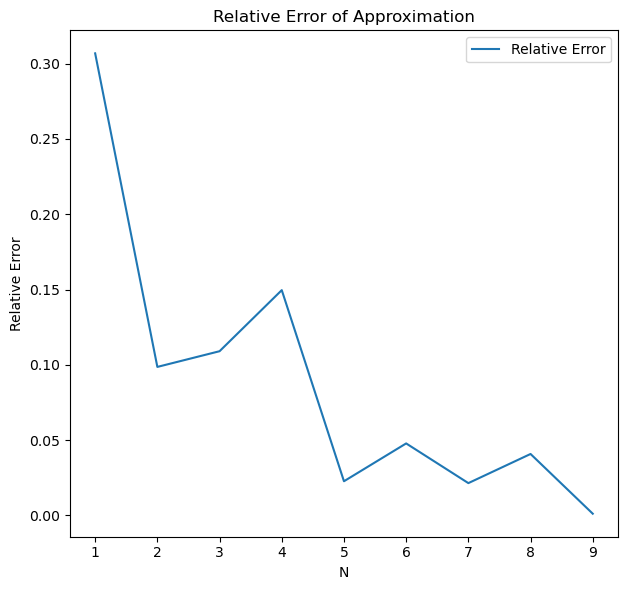

In [135]:
n_small = 10
small_n_primes = generate_first_n_primes(n_small)
small_log_n = log(n_small)

small_absolute_errors = [abs(actual - approx) for actual, approx in zip(small_n_primes, small_log_n)]
small_relative_errors = [abs_err / actual if actual != 0 else 0 for abs_err, actual in zip(small_absolute_errors, small_n_primes)]
small_average_absolute_error = np.mean(small_absolute_errors)
small_average_relative_error = np.mean(small_relative_errors)

print(f"Average Absolute Error: {small_average_absolute_error}")
print(f"Average Relative Error: {small_average_relative_error}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(small_relative_errors)+1), small_relative_errors, label='Relative Error')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.title('Relative Error of Approximation')
plt.legend()

plt.tight_layout()
plt.show()


We can see that for this function, it does poorly for small n, but as n increases so does the accuracy. This exercise was meant to build intuition of why n log n approximates primes so well. There are other variants that approxmiate primes even better. I am still building my intuition of why this is. 

In [131]:
print(f"{small_n_primes[8]}")
print(f"{small_log_n[8]}")
print(f"{small_absolute_errors[8]}")
print(f"{small_relative_errors[8]}")



23
23.02585092994046
0.025850929940460787
889.7165422278047
